In [83]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

# ESERCIZIO 0

Il grafico della VA Y ha valore atteso maggiore dal momento che l'area della sua FDR con il piano Y è maggiore di quella generata da X

2 equivale al percentile 70% 80% di X (non si capisce bene) ed equivale al 20% circa

il cinquantesimo percentile per X è 1
il cinqauntesimo percentile per Y è 3.qualcosa

$$F_X(5) - F_X(2) - p_X(2) = 1 - 0.7 - 0.2 = 0.1 = 10 \%$$
$$F_Y(5) - F_Y(2) - p_Y(2) = 0.7 - 0.2 - 0.2 = 30 \%$$

Mediana di Y è il valore al cinquantesimo percentile quindi circa 3
la media invece 

# ESERCIZIO 1

sia $X \sim E(\nu)$
1) $p_X(x) = \nu * e ^ {-\nu *x}$
2) $\sigma = \frac{1}{\nu}$

posso stimare il valore atteso del campione $X1,...,X_n$ utilizzando la media campionaria. Tale stimatore è non distorto

# ESERCIZIO 2

In [6]:
df=pd.read_csv('cani.csv',sep=';', decimal=',')
df

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
0,S0601,NO,0,10.35,0,NaN,0,2,NO,5.25,0.00,2.50,1.15,0.97,70.0,37.0,78.69,23.75,1.58,0.99
1,C0621,NO,0,15.21,1,1.0,341,3,NO,6.00,0.00,1.61,1.50,1.47,83.0,51.0,130.58,23.88,1.94,0.99
2,B0918,NO,0,15.77,1,1.0,117,3,NO,3.20,0.00,2.50,1.87,2.08,91.0,62.0,180.35,16.22,2.21,0.84
3,R1009,NO,0,13.54,1,1.0,93,4,SI,26.50,0.00,3.07,2.28,2.85,75.0,44.0,234.17,40.15,2.09,1.16
4,R1513,NO,0,10.72,0,NaN,666,3,NO,11.00,0.00,2.54,0.75,0.86,69.0,38.0,139.84,43.89,1.98,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,G1006,SI,3,11.35,1,1.0,46,4,NO,8.80,4.51,2.77,1.74,NaN,78.0,46.0,260.51,41.33,2.23,1.21
157,A1403,SI,3,13.39,1,1.0,275,4,NO,8.00,4.54,2.49,NaN,NaN,74.0,41.0,104.55,29.51,1.76,1.03
158,Z1003,SI,3,12.40,1,1.0,43,3,NO,14.00,4.60,2.52,NaN,NaN,77.0,46.0,371.13,57.22,2.54,1.36
159,B1135,SI,3,14.19,1,1.0,269,4,NO,2.50,5.09,3.10,1.51,2.56,79.0,47.0,180.58,38.38,2.21,1.16


#### Punto 1

In [9]:
antiaritmico = pd.crosstab(index=df['Antiaritmico'],columns=['FA'])
antiaritmico

col_0,FA
Antiaritmico,
NO,150
SI,11


11 cani assumono un farmaco antiaritmico

Basterebbe utilizzare una codifica booleana per questo dato quindi SI = 1 e NO = 0

In [11]:
congiunta = antiaritmico = pd.crosstab(index=df['Antiaritmico'],columns=df['MC'])
congiunta

MC,0.0,1.0
Antiaritmico,,
NO,28,78
SI,0,9


In [14]:
str(9/(9+78)*100)+" %"

'10.344827586206897 %'

#### Punto 2

In [18]:
survival=df['SURVIVALTIME']
survival.describe()

count     161.000000
mean      459.888199
std       467.196706
min         0.000000
25%       113.000000
50%       300.000000
75%       711.000000
max      2906.000000
Name: SURVIVALTIME, dtype: float64

il primo quartile è al valore 113, il terzo quartile è al valore 711

In [27]:
len(df[(df['SURVIVALTIME']>=113) & (df['SURVIVALTIME']<=711)])

81

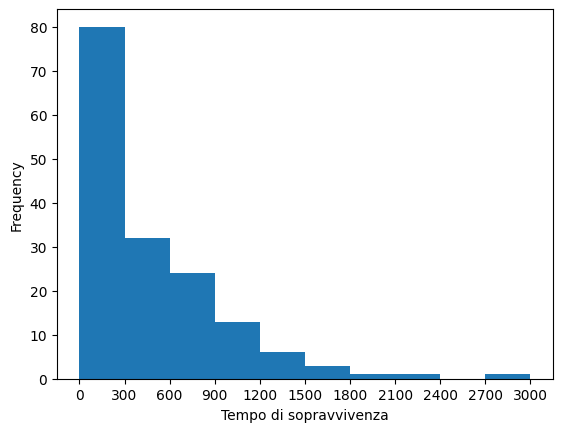

In [36]:
x=np.arange(0,3001,300)
survival.plot.hist(bins=x)
plt.xlabel("Tempo di sopravvivenza")
plt.xticks(x)
plt.show()
plt.show()

In [98]:
mean=survival.mean()

In [108]:
std=survival.std()

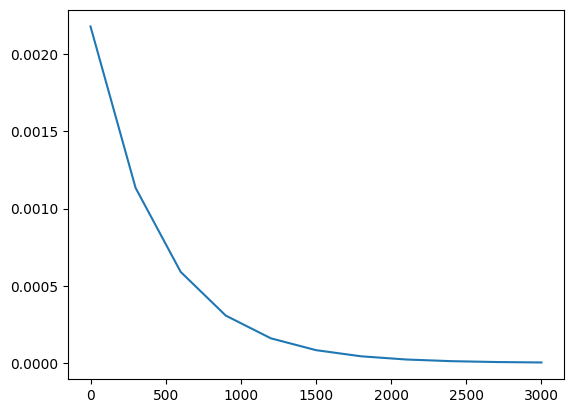

In [113]:
x=np.arange(0,3001,300)
dist=st.expon(scale=(459),loc=0)
plt.plot(x,dist.pdf(x))
plt.show()

Dal momento che in una esponenziale il parametro $\lambda = \frac{1}{E(X)}$ posso stimare $\lambda=\frac{1}{459}$

# ESERCIZIO 3

In [149]:
filter=df[df["MC"].notna() & df["OndaEA"].notna() & (df["MORTE"] == 1)]
filter

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
1,C0621,NO,0,15.21,1,1.0,341,3,NO,6.0,0.00,1.61,1.50,1.47,83.0,51.0,130.58,23.88,1.94,0.99
2,B0918,NO,0,15.77,1,1.0,117,3,NO,3.2,0.00,2.50,1.87,2.08,91.0,62.0,180.35,16.22,2.21,0.84
3,R1009,NO,0,13.54,1,1.0,93,4,SI,26.5,0.00,3.07,2.28,2.85,75.0,44.0,234.17,40.15,2.09,1.16
5,E0901,NO,0,8.50,1,1.0,712,2,NO,4.8,0.00,1.80,1.37,1.69,57.0,30.0,191.23,82.42,2.25,1.58
10,D0911,NO,0,14.36,1,1.0,76,3,NO,15.0,0.00,2.51,1.35,2.25,73.0,42.0,154.64,42.40,2.06,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,P1317,SI,3,14.32,1,1.0,201,3,NO,10.0,4.31,3.33,1.34,1.84,83.0,52.0,176.58,29.58,2.18,1.04
151,V1011,SI,3,10.98,1,1.0,315,2,NO,16.0,4.35,2.35,1.63,3.02,72.0,42.0,249.26,69.69,2.53,1.47
155,R1008,SI,3,8.44,1,1.0,408,4,NO,7.0,4.51,2.62,1.02,1.89,78.0,47.0,203.00,44.06,2.33,1.25
159,B1135,SI,3,14.19,1,1.0,269,4,NO,2.5,5.09,3.10,1.51,2.56,79.0,47.0,180.58,38.38,2.21,1.16


OndaAE è un tipo di dato scalare

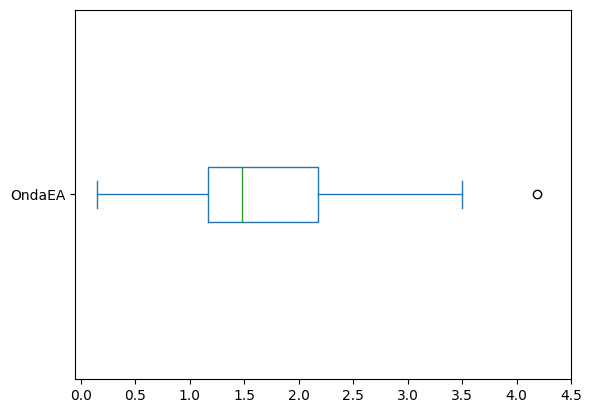

In [162]:
x=np.arange(0,5,0.5)
filter['OndaEA'].plot.box(vert=False)
plt.xticks(x)
plt.show()

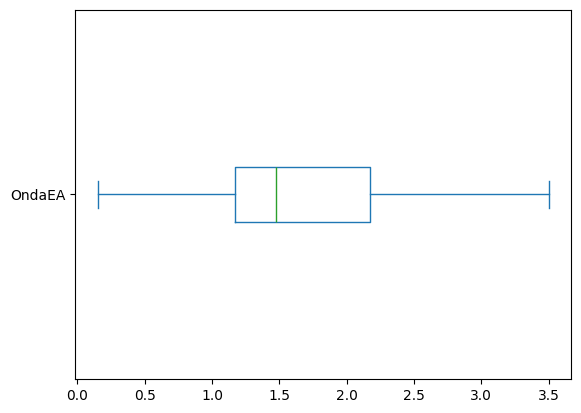

In [163]:
x=np.arange(0,4,0.50)
filter_no_outlier=filter[filter['OndaEA']<4]
outlier=filter[filter['OndaEA']>4]
filter_no_outlier['OndaEA'].plot.box(vert=False)
plt.xticks(x)
plt.show()

In [164]:
outlier

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
134,F0603,SI,2,13.4,1,1.0,248,3,SI,14.5,3.59,3.17,1.8,4.19,63.0,34.0,176.34,65.29,2.18,1.44


In [157]:
print("4.19")

4.19


Si ,morto per morte cardiaca

In [180]:
ondaae_mc=filter[filter['MC']==1]
ondaae_nmc=filter[filter['MC']==0]

In [181]:
ondaae_nmc.describe()

,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
count,17.000000,17.000000,17.0,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,16.000000,17.000000,17.000000,17.000000,17.000000
mean,0.470588,11.991176,1.0,0.0,550.764706,2.294118,14.547059,1.683529,2.014118,1.147647,1.299412,73.562500,42.812500,148.074118,38.060588,1.958235,1.130000
std,0.799816,2.426046,0.0,0.0,445.529815,0.587868,9.533632,1.547247,0.279532,0.265178,0.435868,10.513285,8.856024,50.521057,20.915948,0.259380,0.223663
min,0.000000,7.020000,1.0,0.0,20.000000,2.000000,3.500000,0.000000,1.370000,0.650000,0.660000,53.000000,27.000000,65.250000,13.070000,1.480000,0.800000
25%,0.000000,10.000000,1.0,0.0,204.000000,2.000000,6.000000,0.000000,1.950000,0.960000,1.080000,65.000000,35.750000,109.450000,24.520000,1.770000,0.960000
50%,0.000000,12.610000,1.0,0.0,325.000000,2.000000,16.000000,2.090000,2.060000,1.170000,1.220000,75.500000,43.500000,141.980000,31.590000,1.950000,1.100000
75%,1.000000,13.910000,1.0,0.0,854.000000,2.000000,22.000000,2.930000,2.190000,1.310000,1.410000,81.250000,49.250000,190.100000,42.570000,2.120000,1.230000
max,2.000000,16.470000,1.0,0.0,1509.000000,4.000000,32.000000,4.010000,2.440000,1.570000,2.220000,88.000000,57.000000,243.280000,84.060000,2.450000,1.550000


Si, il terzo quartile corrisponde a 1.41

In [182]:
len(ondaae_mc)

66

In [183]:
len(ondaae_nmc)

17

In [186]:
s=1.41

In [184]:
len(ondaae_mc[ondaae_mc['OndaEA']>=s])

41

In [185]:
len(ondaae_nmc[ondaae_nmc['OndaEA']<s])

12

In [189]:
mc = len(ondaae_mc[ondaae_mc['OndaEA']>=s])
nmc = len(ondaae_nmc[ondaae_nmc['OndaEA']<s])
sensibilita = mc / len(ondaae_mc)
specificita = nmc / len(ondaae_nmc)

In [190]:
sensibilita

0.6212121212121212

In [191]:
specificita

0.7058823529411765